In [146]:
from konlpy.tag import Okt, Kkma, Hannanum
from wordcloud import WordCloud
from ckonlpy.tag import Twitter, Postprocessor
from nltk import Text
# # 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [114]:
okt = Okt()
kkma = Kkma()
han = Hannanum()

In [115]:
sample_text = "헉. 안녕하세요. 오늘은 9월 24일 화요일입니다. 졸려요"

# 의미를 부여할 수 있는 단위

In [116]:
for tokenizer in [okt,kkma,han]:
    print(tokenizer, '를 사용한 결과 : ')
    print(tokenizer.morphs(sample_text))
    print(tokenizer.pos(sample_text))
    print('-'*100)

<konlpy.tag._okt.Okt object at 0x33da260f0> 를 사용한 결과 : 
['헉', '.', '안녕하세요', '.', '오늘', '은', '9월', '24일', '화요일', '입니다', '.', '졸려요']
[('헉', 'Adverb'), ('.', 'Punctuation'), ('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('오늘', 'Noun'), ('은', 'Josa'), ('9월', 'Number'), ('24일', 'Number'), ('화요일', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('졸려요', 'Verb')]
----------------------------------------------------------------------------------------------------
<konlpy.tag._kkma.Kkma object at 0x12cbc1ca0> 를 사용한 결과 : 
['헉', '.', '안녕하', '세요', '.', '오늘', '은', '9', '월', '24', '일', '화요일', '이', 'ㅂ니다', '.', '졸리', '어요']
[('헉', 'MAG'), ('.', 'SF'), ('안녕하', 'VA'), ('세요', 'EFN'), ('.', 'SF'), ('오늘', 'NNG'), ('은', 'JX'), ('9', 'NR'), ('월', 'NNM'), ('24', 'NR'), ('일', 'NNM'), ('화요일', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF'), ('졸리', 'VV'), ('어요', 'EFN')]
----------------------------------------------------------------------------------------------------
<konlpy.tag._hannanum.Hannanum object 

---

### 임의의 문장 품사 태깅하기
###  태깅된 품사에 따라 분류 후 저장하기

In [117]:
import json
import pandas as pd

In [118]:
text = '나는 생각한다, 고로 존재한다.'
okt_text = okt.pos(text)

tag_dict = {}

for k  in okt.tagset.keys():
    tag_dict[k] = []
    
    
for p in okt_text:
    tag_dict[p[1]].append(p[0])
    
df = pd.DataFrame.from_dict(tag_dict,orient='index')
df
# df.dropna(how='all')

,0,1,2,3
Adjective,None,None,None,None
Adverb,None,None,None,None
Alpha,None,None,None,None
Conjunction,None,None,None,None
Determiner,None,None,None,None
Eomi,None,None,None,None
Exclamation,None,None,None,None
Foreign,None,None,None,None
Hashtag,None,None,None,None
Josa,는,None,None,None


In [119]:
tag_dict

{'Adjective': [],
 'Adverb': [],
 'Alpha': [],
 'Conjunction': [],
 'Determiner': [],
 'Eomi': [],
 'Exclamation': [],
 'Foreign': [],
 'Hashtag': [],
 'Josa': ['는'],
 'KoreanParticle': [],
 'Noun': ['나', '생각', '고로', '존재'],
 'Number': [],
 'PreEomi': [],
 'Punctuation': [',', '.'],
 'ScreenName': [],
 'Suffix': [],
 'Unknown': [],
 'Verb': ['한다', '한다']}

In [120]:
df.to_csv('result.csv',encoding='cp949')

--- 
불용어

In [121]:
stopwords =[
    '오',
    ',',
    '!',
    '헉',
    '은',
    '를',
    '에게'
]

In [122]:
token = okt.morphs(sample_text)

In [123]:
[word for word in token if word not in stopwords]

['.', '안녕하세요', '.', '오늘', '9월', '24일', '화요일', '입니다', '.', '졸려요']

In [125]:
twitter = Twitter()

/opt/anaconda3/lib/python3.12/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [126]:
postprocessor = Postprocessor(twitter,stopwords)

In [127]:
postprocessor.pos(sample_text)

[('.', 'Punctuation'),
 ('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('오늘', 'Noun'),
 ('9월', 'Number'),
 ('24일', 'Number'),
 ('화요일', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('졸려요', 'Verb')]

In [128]:
twitter.add_dictionary('입니다','Noun')

In [129]:
twitter.pos(sample_text)

[('헉', 'Adverb'),
 ('.', 'Punctuation'),
 ('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('오늘', 'Noun'),
 ('은', 'Josa'),
 ('9월', 'Number'),
 ('24일', 'Number'),
 ('화요일', 'Noun'),
 ('입니다', 'Noun'),
 ('.', 'Punctuation'),
 ('졸려요', 'Verb')]

---

In [130]:
sample_text = '미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는 말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누구와 나눌 수조차 없었다.'

In [131]:
twitter.add_dictionary('취업난','Noun')

In [132]:
twitter.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학', 'Noun'),
 ('졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥', 'Noun'),
 ('과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업난', 'Noun'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많', 'Adjective'),
 ('이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자', 'Noun'),
 ('명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상', 'Noun'),
 ('실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조', 'Noun'),
 ('차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [133]:
ngrams = [
    (('대학','졸업'),'Noun'),
    (('지옥','과도'),'Noun'),
    (('합격자','명단'),'Noun')
]

In [134]:
postprocessor = Postprocessor(twitter,ngrams=ngrams)

In [135]:
postprocessor.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학 - 졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥 - 과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업난', 'Noun'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많', 'Adjective'),
 ('이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자 - 명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상', 'Noun'),
 ('실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조', 'Noun'),
 ('차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [136]:
import fitz
from pykospacing import Spacing

path = './장미와 찔레.pdf'
doc = fitz.open(path)
spacing = Spacing()   

In [137]:
# doc_text = ""
# for page in doc:
#     text = page.get_text()
#     temp = text.replace("\n", " ")
#     temp = spacing(temp)
#     doc_text+=temp

In [151]:

# text = '나는 생각한다, 고로 존재한다.'
import pandas as pd
sample_text = '미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는 말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누구와 나눌 수조차 없었다.'
okt_text = okt.pos(sample_text)

tag_dict = {}

for k  in okt.tagset.keys():
    tag_dict[k] = []
    
tag_dict['Modifier'] = []
    
for p in okt_text:
    if p[1] not in tag_dict:
        tag_dict[p[1]] = []
    tag_dict[p[1]].append(p[0])
    
df = pd.DataFrame.from_dict(tag_dict,orient='index')
df
# df.dropna(how='all')

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Adjective,같은,없다는,깊은,없었다,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Adverb,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Alpha,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Conjunction,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Determiner,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Eomi,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Exclamation,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Foreign,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Hashtag,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Josa,는,과도,을,으로,에,을,마다,은,와,조차,...,None,None,None,None,None,None,None,None,None,None


In [152]:
tag_dict = {}

for k  in okt.tagset.keys():
    tag_dict[k] = 0
    
tag_dict['Modifier'] = 0
    
for p in okt.pos(sample_text):
    if p[-1] not in tag_dict:
        tag_dict[p[-1]] = 0  # Initialize the count to 0 if the key is not present
    tag_dict[p[-1]] += 1  # Increment the count

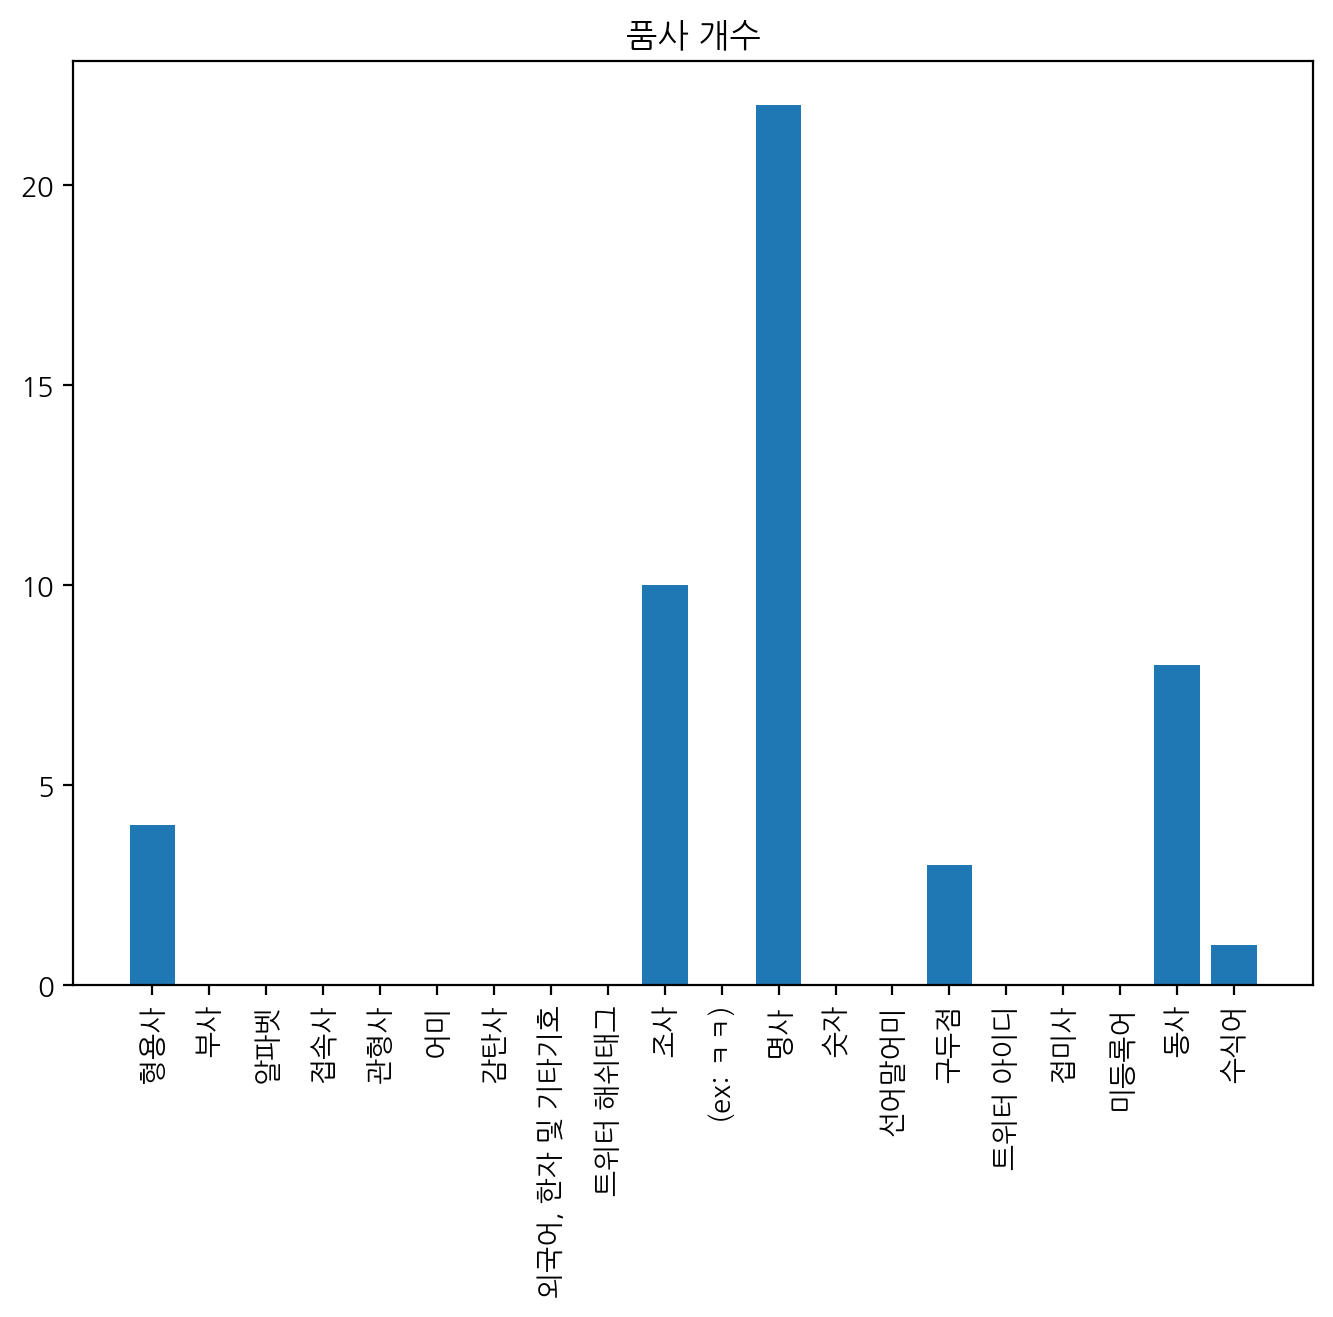

In [153]:
plt.subplots(figsize=(8,6))
plt.bar(tag_dict.keys(),tag_dict.values())
plt.xticks(list(okt.tagset.keys())+['Modifier'],list(okt.tagset.values())+['수식어'], rotation=90)
plt.title('품사 개수')
plt.show()

---
### 워드클라우드

In [154]:
text_count = Text(okt.nouns(sample_text),name='장미와 찔레')

In [170]:
font_path='/Library/Fonts/AppleGothic.ttf'

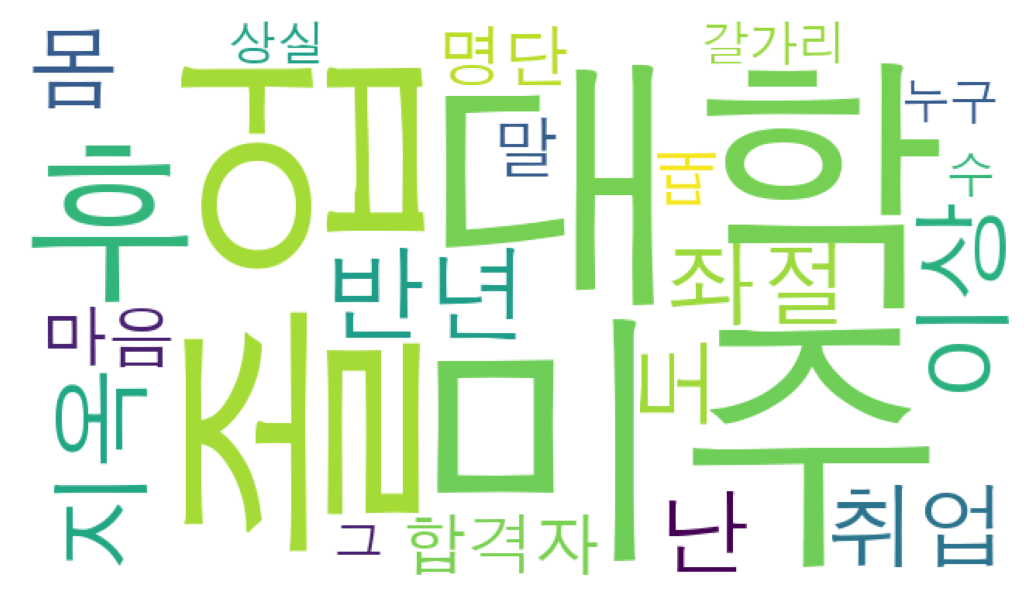

In [173]:
wc = WordCloud(width=640,height=360,background_color='white',font_path=font_path,max_words=100,min_word_length=2)
cloud = wc.generate_from_frequencies(text_count.vocab())

plt.axis('off')
plt.imshow(cloud)

In [177]:
news = pd.read_csv('news_comment_BTS.csv')
news.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [178]:
news["reply"] = news["reply"].str.replace("[^가-힣]", " ", regex=True)
news["reply"].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [180]:
# 명사 추출
nouns = news["reply"].apply(okt.nouns)
nouns

0                                               [국보, 소년단]
1                                                   [아줌마]
2       [팩트, 체크, 현재, 빌보드, 위, 방탄소년단, 위, 위, 위, 위, 위, 위, ...
3                           [방탄소년단, 한국, 사람, 우리, 오래오래, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                 [역시]
1196                                             [우리, 사랑]
1197                                           [애, 꼭, 군대]
1198                                          [군, 면제, 이건]
1199          [정말, 축하, 김남준, 김석진, 민윤기, 정호석, 박지민, 김태형, 전정국]
Name: reply, Length: 1200, dtype: object

In [187]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns.drop_duplicates(inplace=True)

In [188]:
text_count = Text(nouns,name='뉴스')

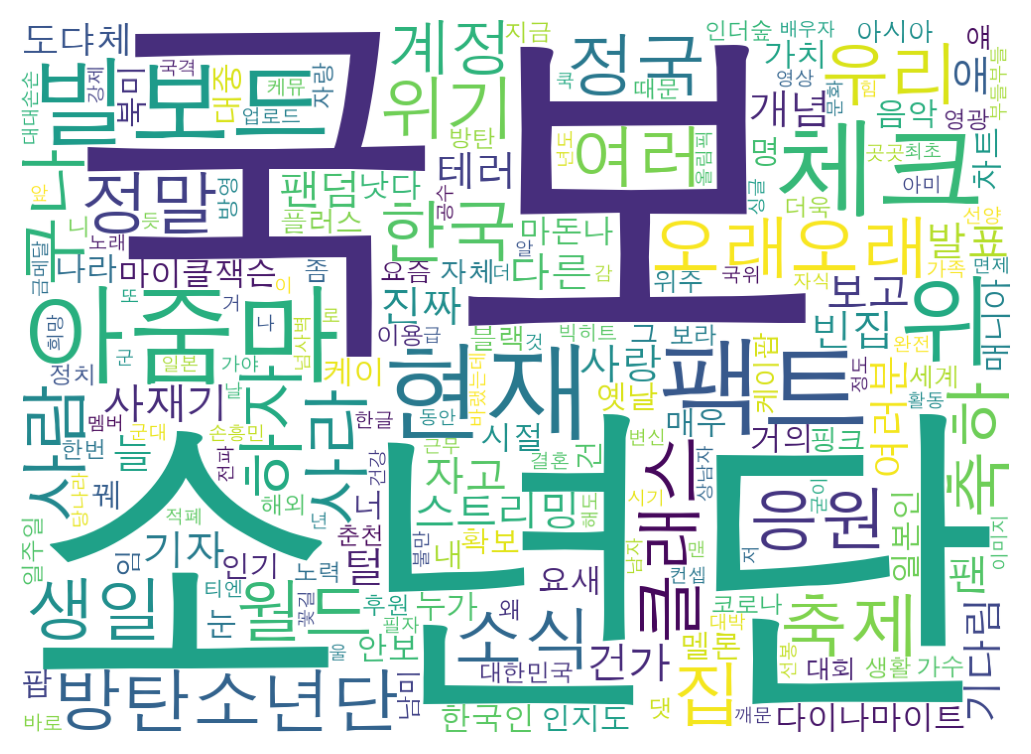

In [192]:
wc = WordCloud(width=1000,height=720,background_color='white',font_path=font_path,min_word_length=2)
cloud = wc.generate_from_frequencies(text_count.vocab())

plt.axis('off')
plt.imshow(cloud)